In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statistics import mean, stdev
from sklearn.preprocessing import scale 
import math
import warnings
warnings.filterwarnings("ignore")
import random
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import json
import urllib.parse
import requests
import glob
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

In [6]:
train = pd.read_csv("train_sub_df.csv")   
test = pd.read_csv("test_sub_df.csv")  

In [3]:
train.head(5)

,Unnamed: 0,parcelid,logerror,transactiondate,month,day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
0,0,11016594,0.0276,2016-01-01,1,Friday,1.0,-1.0,-1.0,2.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,-1.0,6.037107e+13,0,0,0
1,1,14366692,-0.1684,2016-01-01,1,Friday,-1.0,-1.0,-1.0,3.5,...,346458.0,585529.0,2015.0,239071.0,10153.02,-1.0,-1.000000e+00,0,0,0
2,2,12098116,-0.0040,2016-01-01,1,Friday,1.0,-1.0,-1.0,3.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,-1.0,6.037464e+13,0,0,0
3,3,12643413,0.0218,2016-01-02,1,Saturday,1.0,-1.0,-1.0,2.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,-1.0,6.037296e+13,0,0,0
4,4,14432541,-0.0050,2016-01-02,1,Saturday,-1.0,-1.0,-1.0,2.5,...,169574.0,434551.0,2015.0,264977.0,5488.96,-1.0,6.059042e+13,0,0,0


In [4]:
test.head(5)

,Unnamed: 0,ParcelId,201610,201611,201612,201710,201711,201712,parcelid,airconditioningtypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
0,0,10754147,0,0,0,0,0,0,10754147,-1.0,...,-1.0,9.0,2015.0,9.0,-1.00,-1.0,-1.0,0,0,0
1,1,10759547,0,0,0,0,0,0,10759547,-1.0,...,-1.0,27516.0,2015.0,27516.0,-1.00,-1.0,-1.0,0,0,0
2,2,10843547,0,0,0,0,0,0,10843547,-1.0,...,650756.0,1413387.0,2015.0,762631.0,20800.37,-1.0,-1.0,0,0,0
3,3,10859147,0,0,0,0,0,0,10859147,-1.0,...,571346.0,1156834.0,2015.0,585488.0,14557.57,-1.0,-1.0,0,0,0
4,4,10879947,0,0,0,0,0,0,10879947,-1.0,...,193796.0,433491.0,2015.0,239695.0,5725.17,-1.0,-1.0,0,0,0


In [5]:
#delete non-important columns
test_df = test.copy()
train_df = train.copy()

drop_test_cols = ['ParcelId','parcelid','Unnamed: 0',
                 '201610','201611','201612','201710',
                 '201711','201712']
drop_train_cols = ['parcelid','Unnamed: 0','logerror',
                  'transactiondate','month','day']
train_y = train['logerror']
test_df = test_df.drop(drop_test_cols,axis=1,inplace=False)
train_df = train_df.drop(drop_train_cols,axis=1,inplace=False)

test_df = test_df._get_numeric_data()
train_df = train_df._get_numeric_data()

col_names = train_df.columns.tolist()

In [6]:
print(test_df.shape, train_df.shape)

(2985217, 49) (90275, 49)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     train_df, train_y, test_size=0.33, random_state=42)

In [8]:
data_dmatrix = xgb.DMatrix(train_df,label=train_y)

In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          
                          silent = 1,
                          colsample_bytree = 0.8, 
                          learning_rate = 0.15,
                          max_depth = 4, 
                          alpha = 10, 
                          subsample = .6,
                          n_estimators = 900)

In [19]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)

In [20]:
mse_test = mean_squared_error(y_test, preds)
mse_train = mean_squared_error(y_train, preds_train)
print("RMSE TEST: ", mse_test, " RMSE TRAIN: ",mse_train )

RMSE TEST:  0.027723887422951506  RMSE TRAIN:  0.014179409046945566


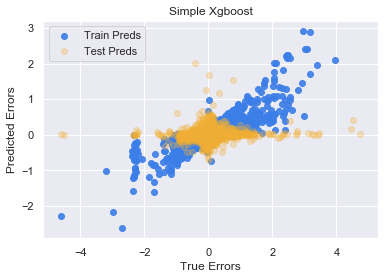

In [23]:
sns.set()

plt.scatter(y_train, preds_train,color="#3c7ee8", label="Train Preds",alpha=.9)
plt.scatter(y_test, preds,color="#f2b035", label="Test Preds",alpha=.3)
plt.xlabel("True Errors")
plt.ylabel("Predicted Errors")
plt.title("Simple Xgboost")
plt.legend()
plt.show()

# plt.grid()
# plt.scatter(y_train, preds_train,color="#e8593a",alpha=.6)
# plt.scatter(y_test, preds,color="#42bcf4",alpha=.6)
# plt.show()

In [ ]:
0.02605856091345577

In [103]:
test_pred=xg_reg.predict(test_df)

In [104]:
fudge_nov = 0.8879242828636326
fudge_dec = 1.1701592749545944

In [105]:
sample_sub = pd.read_csv("sample_submission.csv")
parc_id =np.array(sample_sub['ParcelId'])
oct_col = np.around(np.array(test_pred),decimals=4)
nov_col = np.around(fudge_nov * np.array(test_pred),decimals=4)
dec_col = np.around(fudge_dec * np.array(test_pred),decimals=4)



submit_df = pd.DataFrame({'ParcelId':parc_id,
                          '201610':oct_col, '201611':nov_col,
                          '201612':dec_col,'201710':oct_col, 
                          '201711':nov_col,'201712':dec_col})

cols = submit_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
submit_df = submit_df[cols]

In [106]:
submit_df.head(3)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.0613,0.0544,0.0717,0.0613,0.0544,0.0717
1,10759547,0.0132,0.0117,0.0155,0.0132,0.0117,0.0155
2,10843547,0.1110,0.0986,0.1299,0.1110,0.0986,0.1299


In [107]:
# Give the filename you wish to save the file to

filename1 = 'submission_file_xgb.csv'

files_present_1 = glob.glob(filename1)

if not files_present_1 or not files_present_2:
    submit_df.to_csv(filename1,index = False)
    print('Success!')
else:
    print('WARNING: This file already exists!' )

Success!


In [51]:
rf = RandomForestRegressor(n_estimators=500,
                            max_features=6,
                            max_depth=11,
                            n_jobs=-1,
                            random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

feature_imp = pd.Series(rf.feature_importances_,index=col_names).sort_values(ascending=False)
target_pred=rf.predict(X_test)
target_pred_train=rf.predict(X_train)
test_err = round(metrics.mean_squared_error(y_test, target_pred),4)
train_err = round(metrics.mean_squared_error(y_train, target_pred_train),4)
print("MSE test:  ",test_err, '\n',
     "MSE train:  ",train_err)

MSE test:   0.0259 
 MSE train:   0.0221


In [59]:
threshold = np.arange(.005,.02,.001)
test_mse = []
train_mse = []
thresh = []
for i in threshold:
    sfm = SelectFromModel(rf, threshold=i)
    sfm.fit(X_train, y_train)

    feat_labels = X_train.columns.tolist()
    imp_labels = []

    for feature_list_index in sfm.get_support(indices=True):
        imp_labels.append(feat_labels[feature_list_index])
    
    
    rf = RandomForestRegressor(n_estimators=300,
                                max_features=6,
                                max_depth=11,
                                n_jobs=-1,
                                random_state=42)
    rf.fit(X_train[imp_labels], y_train)

    target_pred=rf.predict(X_test[imp_labels])
    target_pred_train=rf.predict(X_train[imp_labels])
    test_err = round(metrics.mean_squared_error(y_test, target_pred),6)
    train_err = round(metrics.mean_squared_error(y_train, target_pred_train),6)
    test_mse.append(test_err)
    train_mse.append(train_err)
    thresh.append(round(i,3))
    print("Thresh: ",i, " MSE test: ",test_err, " MSE train: ",train_err)

Thresh:  0.005  MSE test:  0.0259  MSE train:  0.021837
Thresh:  0.006  MSE test:  0.0259  MSE train:  0.021837
Thresh:  0.007  MSE test:  0.025902  MSE train:  0.021869
Thresh:  0.008  MSE test:  0.02588  MSE train:  0.021965
Thresh:  0.009000000000000001  MSE test:  0.025891  MSE train:  0.021826
Thresh:  0.01  MSE test:  0.025887  MSE train:  0.021853
Thresh:  0.011  MSE test:  0.025887  MSE train:  0.021853
Thresh:  0.012  MSE test:  0.025842  MSE train:  0.021739
Thresh:  0.013000000000000001  MSE test:  0.025847  MSE train:  0.021762
Thresh:  0.014000000000000002  MSE test:  0.0258  MSE train:  0.02164
Thresh:  0.015  MSE test:  0.0258  MSE train:  0.02164
Thresh:  0.016  MSE test:  0.025846  MSE train:  0.021637
Thresh:  0.017  MSE test:  0.025795  MSE train:  0.021567
Thresh:  0.018000000000000002  MSE test:  0.025842  MSE train:  0.021354
Thresh:  0.019  MSE test:  0.025842  MSE train:  0.021354


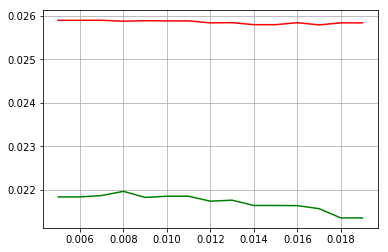

In [61]:
plt.grid()
plt.plot(thresh,test_mse, color='red')
plt.plot(thresh,train_mse, color='green')
plt.show()

In [ ]:
#looks like .014

In [64]:
best_thresh = .014
sfm = SelectFromModel(rf, threshold=.014)
sfm.fit(X_train, y_train)
feat_labels = X_train.columns.tolist()
imp_labels = []

for feature_list_index in sfm.get_support(indices=True):
    imp_labels.append(feat_labels[feature_list_index])
    
    
rf = RandomForestRegressor(n_estimators=300,
                                max_features=6,
                                max_depth=11,
                                n_jobs=-1,
                                random_state=42)
rf.fit(X_train[imp_labels], y_train)
feature_imp = pd.Series(rf.feature_importances_,index=imp_labels).sort_values(ascending=False)
print(feature_imp)

target_pred=rf.predict(X_test[imp_labels])
target_pred_train=rf.predict(X_train[imp_labels])
test_err = round(metrics.mean_squared_error(y_test, target_pred),6)
train_err = round(metrics.mean_squared_error(y_train, target_pred_train),6)

print("Thresh: ",best_thresh, " MSE test: ",test_err, " MSE train: ",train_err)

taxamount                       0.100613
structuretaxvaluedollarcnt      0.088638
latitude                        0.087816
taxvaluedollarcnt               0.084052
longitude                       0.079497
calculatedfinishedsquarefeet    0.073474
lotsizesquarefeet               0.073328
landtaxvaluedollarcnt           0.067138
finishedsquarefeet12            0.055705
yearbuilt                       0.051836
regionidzip                     0.046795
censustractandblock             0.036156
rawcensustractandblock          0.035628
regionidcity                    0.024903
regionidneighborhood            0.023857
bedroomcnt                      0.023836
calculatedbathnbr               0.015947
bathroomcnt                     0.015694
fullbathcnt                     0.015086
dtype: float64
Thresh:  0.014  MSE test:  0.0258  MSE train:  0.02164


In [68]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': [2, 3, 4],
    'n_estimators': [100, 200, 300, 1000],
    'random_state': [42]

}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train[imp_labels], y_train)
grid_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 49.7min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'n_estimators': 200,
 'random_state': 42}

In [69]:
rf = RandomForestRegressor(n_estimators=200,
                                max_features=2,
                                max_depth=11,
                                bootstrap=True,
                                n_jobs=-1,
                                random_state=42)
rf.fit(X_train[imp_labels], y_train)
feature_imp = pd.Series(rf.feature_importances_,index=imp_labels).sort_values(ascending=False)
print(feature_imp)

target_pred=rf.predict(X_test[imp_labels])
target_pred_train=rf.predict(X_train[imp_labels])
test_err = round(metrics.mean_squared_error(y_test, target_pred),6)
train_err = round(metrics.mean_squared_error(y_train, target_pred_train),6)

print("Thresh: ",best_thresh, " MSE test: ",test_err, " MSE train: ",train_err)

taxamount                       0.087974
structuretaxvaluedollarcnt      0.081034
latitude                        0.080462
taxvaluedollarcnt               0.080145
calculatedfinishedsquarefeet    0.074701
landtaxvaluedollarcnt           0.072906
longitude                       0.068313
lotsizesquarefeet               0.064147
finishedsquarefeet12            0.060332
yearbuilt                       0.050128
regionidzip                     0.047883
censustractandblock             0.044235
rawcensustractandblock          0.043985
bedroomcnt                      0.028465
regionidneighborhood            0.026591
calculatedbathnbr               0.025697
regionidcity                    0.022993
bathroomcnt                     0.021766
fullbathcnt                     0.018244
dtype: float64
Thresh:  0.014  MSE test:  0.025856  MSE train:  0.021673


In [70]:
test_pred=rf.predict(test_df[imp_labels])

In [71]:
fudge_nov = 0.8879242828636326
fudge_dec = 1.1701592749545944



In [100]:

sample_sub = pd.read_csv("sample_submission.csv")
parc_id =np.array(sample_sub['ParcelId'])
oct_col = np.around(np.array(test_pred),decimals=4)
nov_col = np.around(fudge_nov * np.array(test_pred),decimals=4)
dec_col = np.around(fudge_dec * np.array(test_pred),decimals=4)



submit_df = pd.DataFrame({'ParcelId':parc_id,
                          '201610':oct_col, '201611':nov_col,
                          '201612':dec_col,'201710':oct_col, 
                          '201711':nov_col,'201712':dec_col})

cols = submit_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
submit_df = submit_df[cols]


In [101]:
submit_df.head(3)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.2195,0.1949,0.2568,0.2195,0.1949,0.2568
1,10759547,0.1114,0.0989,0.1303,0.1114,0.0989,0.1303
2,10843547,0.0550,0.0488,0.0643,0.0550,0.0488,0.0643


In [102]:
# Give the filename you wish to save the file to

filename1 = 'submission_file2.csv'

files_present_1 = glob.glob(filename1)

if not files_present_1 or not files_present_2:
    submit_df.to_csv(filename1,index = False)
    print('Success!')
else:
    print('WARNING: This file already exists!' )

Success!


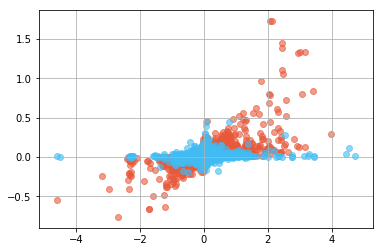

In [109]:
plt.grid()
plt.scatter(y_train, target_pred_train,color="#e8593a",alpha=.6)
plt.scatter(y_test, target_pred,color="#42bcf4",alpha=.6)
plt.show()

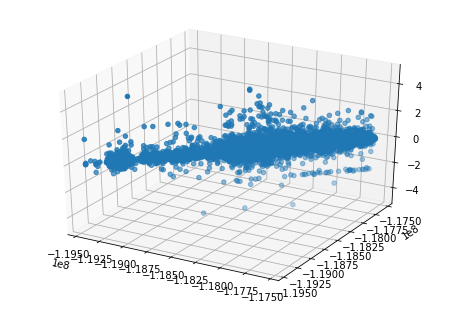

In [12]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = train['longitude']
sequence_containing_y_vals = train['longitude']
sequence_containing_z_vals = train['logerror']


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()